<a href="https://colab.research.google.com/github/Vita1ik/Machine_Learning/blob/main/Practise_1_CVDL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №1
## Класифікація зображень за допомогою PyTorch

**Мета роботи: Навчитись тренувати базову нейронну мережу для класифікації зображень.**

**Вимоги:**

1.   Встановлені Python та бібліотеки PyTorch, torchvision, matplotlib.
2.   Завантажений набір даних CIFAR-10.

## Завдання до лабораторної роботи (частина І): Робота з даними (CIFAR-10)

1.   Імпортуйте необхідні бібліотеки:
```
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid
```
2.   Завантаження даних. Напишіть функцію, яка завантажує набір даних CIFAR-10.
3.   Перевірка наявності даних. Напишіть код, який перевіряє, чи дані завантажені та розпаковані успішно. Виведіть повідомлення про статус завантаження.
4.   Підготовка даних. Напишіть код, щоб імплементувати трансформації для зображень:
*    перетворення в тензори;
*    денормалізація (при необхідності).  

Використайте `torchvision.transforms` для підготовки даних.
5.   Створення DataLoader. Створіть DataLoader для навчального та тестового наборів даних, щоб спростити процес завантаження даних за батчами.
6.   Візуалізація прикладів:
*   напишіть функцію для візуалізації деяких зображень з набору даних;
*   відобразіть кілька зображень з їхніми реальними мітками.
7.   Ваші висновки до частини І.

## Завдання до лабораторної роботи (частина ІІ):
0. Розділіть набір даних на навчальний і тестовий.
1. Визначення структури CNN.
    - Створіть клас для цільної нейронної мережі, яка буде містити мінімум два повнозв'язних шари.
2. Вибір функції втрати та оптимізатора:
    - визначте функцію втрат (наприклад, CrossEntropyLoss) та оптимізатор (наприклад, SGD або Adam).
3. Тренування моделі.
    - Реалізуйте цикл навчання, де:
        - модель тренується на навчальному наборі даних;
        - виводиться значення функції втрат та точність (на навчальній та валідаційній множинах) після кожної епохи.
4. Оцінка моделі:
    - визначте точність моделі на тестовому наборі даних;
    - виведіть детальні статистики (загальна точність та точність для кожного класу).
5. Візуалізація результатів:
    - візуалізуйте кілька випадкових передбачених зображень разом з їхніми реальними мітками та передбаченнями;
    - побудуйте графік точності та втрат для навчального набору даних на кожній епосі.

## Додаткові завдання (за бажанням):

- Напишіть код, який виведе кількість зображень у кожному класі в директорії train. Для цього ви можете використовувати os.listdir() для підрахунку зображень у відповідних піддиректоріях.
- Створіть графік (наприклад, гістограму), який відображає кількість зображень в кожному класі. Ви можете використовувати бібліотеку matplotlib для візуалізації.
- Виведіть кілька випадкових зображень з кожного класу разом із їхніми мітками.
- Дослідіть, як зміна параметрів підготовки даних (наприклад, різні трансформації) впливає на результати моделі.
- Спробуйте змінити архітектуру моделі (додати додаткові шари) та проаналізуйте, як це впливає на результати.
- Включіть регуляризацію (наприклад, Dropout) для покращення загальної точності.


Files already downloaded and verified
Files already downloaded and verified


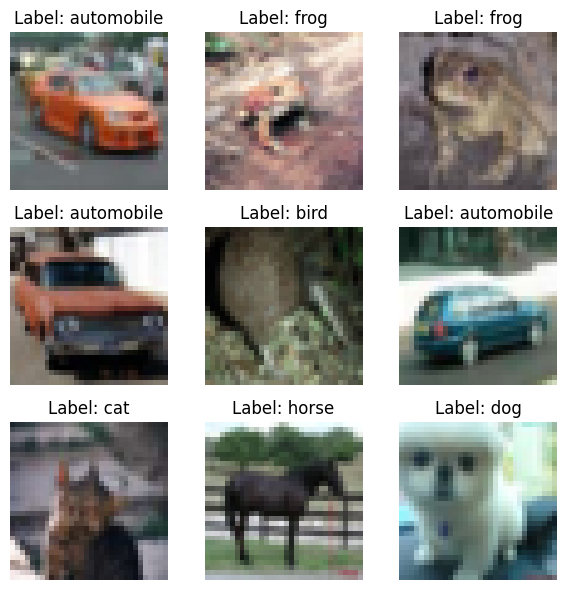

In [16]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Завантажуємо датасет
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Завантажуємо батч із 9 зображень
dataloader = DataLoader(trainset, batch_size=9, shuffle=True)
images, labels = next(iter(dataloader))
classes = trainset.classes

# Відображаємо 9 зображень
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    img = images[i].numpy().transpose((1, 2, 0))  # Перетворення у формат (H, W, C)
    ax.imshow(img)
    ax.set_title(f'Label: {classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()



In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, accuracy_score


transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Нормалізація
])
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)


In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Пулінг для зменшення розмірності
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Повнозв'язний шар
        self.fc2 = nn.Linear(128, 10)  # Вихідний шар для 10 класів
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Перетворення у вектор
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Ініціалізуємо модель
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [19]:
# Визначення функції втрат та оптимізатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Навчання моделі

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 30
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch 1/30 - Loss: 0.3186, Accuracy: 88.67%
Epoch 2/30 - Loss: 0.2748, Accuracy: 90.12%
Epoch 3/30 - Loss: 0.2308, Accuracy: 91.66%
Epoch 4/30 - Loss: 0.2038, Accuracy: 92.74%
Epoch 5/30 - Loss: 0.1758, Accuracy: 93.67%
Epoch 6/30 - Loss: 0.1578, Accuracy: 94.31%
Epoch 7/30 - Loss: 0.1386, Accuracy: 95.06%
Epoch 8/30 - Loss: 0.1272, Accuracy: 95.41%
Epoch 9/30 - Loss: 0.1190, Accuracy: 95.79%
Epoch 10/30 - Loss: 0.1134, Accuracy: 96.07%
Epoch 11/30 - Loss: 0.1058, Accuracy: 96.22%
Epoch 12/30 - Loss: 0.0951, Accuracy: 96.66%
Epoch 13/30 - Loss: 0.0886, Accuracy: 96.85%
Epoch 14/30 - Loss: 0.0839, Accuracy: 97.06%
Epoch 15/30 - Loss: 0.0919, Accuracy: 96.76%
Epoch 16/30 - Loss: 0.0808, Accuracy: 97.25%
Epoch 17/30 - Loss: 0.0811, Accuracy: 97.15%
Epoch 18/30 - Loss: 0.0787, Accuracy: 97.28%
Epoch 19/30 - Loss: 0.0766, Accuracy: 97.36%
Epoch 20/30 - Loss: 0.0731, Accuracy: 97.40%
Epoch 21/30 - Loss: 0.0756, Accuracy: 97.42%
Epoch 22/30 - Loss: 0.0713, Accuracy: 97.52%
Epoch 23/30 - Loss:

In [21]:
# Оцінка моделі
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Обчислюємо точність
accuracy = accuracy_score(all_labels, all_preds)
print(f"Загальна точність: {accuracy * 100:.2f}%")

# Вивід детальної статистики
print(classification_report(all_labels, all_preds, target_names=classes))


Загальна точність: 70.43%
              precision    recall  f1-score   support

    airplane       0.76      0.75      0.76      1000
  automobile       0.78      0.81      0.80      1000
        bird       0.62      0.57      0.59      1000
         cat       0.52      0.48      0.50      1000
        deer       0.69      0.61      0.65      1000
         dog       0.55      0.69      0.61      1000
        frog       0.77      0.75      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.80      0.85      0.83      1000
       truck       0.82      0.75      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



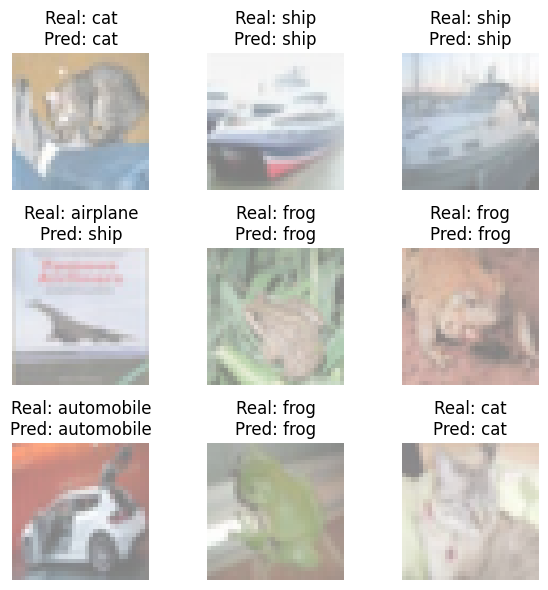

In [22]:
# Візуалізація передбачень

def denormalize(img):
    img = img / 2 + 0.5  # Скасовуємо нормалізацію
    return np.clip(img, 0, 1)

# Відображаємо 9 випадкових зображень із передбаченнями
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    img = denormalize(images[i].permute(1, 2, 0).numpy())
    ax.imshow(img)
    ax.set_title(f"Real: {classes[labels[i]]}\nPred: {classes[predicted[i].item()]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
